<a href="https://colab.research.google.com/github/IanPerigoVianna/Lighthouse_DataScience/blob/main/LH_CD_IAN_LUCAS_PERIGO_VIANNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Notebook do desafio para o processo de formação da Lighthouse Indicium.**

Candidato : Ian Lucas Périgo Vianna

email : ian.perigo.v@gmail.com

github : https://github.com/IanPerigoVianna

Whatsapp : https://api.whatsapp.com/send?phone=5573999509423"

Link do repositório : https://github.com/IanPerigoVianna/Lighthouse_DataScience

In [218]:
# Dependências necessárias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import missingno as msno
import matplotlib.pyplot as plt

# Visualizar Dados
- Análise geral das features
- Distinguir formato das features (int, float, char)
- Identificar anomalias, dados ausentes e erros

In [219]:
host = pd.read_csv('teste_indicium_precificacao.csv')
host.describe()


,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Análise Geral
- Notamos que algumas features apresentam valores máximos e mínimos discrepantes com a média
- Price apresenta valores mínimos igual a zero o que pode indicar um erro visto que cada imóvel que será alugado tende a ter um preço.

In [220]:
# Análise Geral
host.info()

print('\n')
# Segregação de Dados por Tipo de Dados
colunas_por_dtype = host.columns.to_series().groupby(host.dtypes).groups

for dtype, colunas in colunas_por_dtype.items():
    print(f"Tipo de Dados: {dtype}")
    print(", ".join(colunas))
    print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [221]:
# Dividir os dados em categóricos e numéricos

categoricos = host.select_dtypes(include='object')
numericos = host.select_dtypes(exclude='object')

In [222]:
# Obter os valores únicos da feature 'categoria'
valores_unicos = categoricos['room_type'].unique()

# Imprimir os valores únicos
print("Valores únicos da feature 'room_type':")
print(valores_unicos)
print('\n')
# Obter os valores únicos da feature 'categoria'
valores_unicos = categoricos['bairro_group'].unique()

# Imprimir os valores únicos
print("Valores únicos da feature 'bairro_group':")
print(valores_unicos)

Valores únicos da feature 'room_type':
['Entire home/apt' 'Private room' 'Shared room']


Valores únicos da feature 'bairro_group':
['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']


In [223]:
# Verificar valores nulos nos dados categoricos
print('Valores nulos dos dados categoricos em porcentagem')
print(categoricos.isnull().mean() * 100)

Valores nulos dos dados categoricos em porcentagem
nome              0.032724
host_name         0.042950
bairro_group      0.000000
bairro            0.000000
room_type         0.000000
ultima_review    20.558760
dtype: float64


Agora iremos explorar um pouco mais o dataframe com dados categoricos, devemos analisar a possibilidade de codificação dos dados. Fazendo um describe podemos analisar quais features apresentam poucos valores únicos tornando-os mais propensos a codificação.

In [224]:
categoricos.describe()

,nome,host_name,bairro_group,bairro,room_type,ultima_review
count,48878,48873,48894,48894,48894,38842
unique,47904,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


### Visualizando as features não categóricas

Notamos que bairro_group e room_type são candidatos a codificação. Como o tipo de codificação é dependentes da escolha do tipo de machine learning aplicaremos a codificação posteriormente.

In [225]:
print('Valores nulos dos dados numéricos em porcentagem')
print(numericos.isnull().mean() * 100)

Valores nulos dos dados numéricos em porcentagem
id                                0.00000
host_id                           0.00000
latitude                          0.00000
longitude                         0.00000
price                             0.00000
minimo_noites                     0.00000
numero_de_reviews                 0.00000
reviews_por_mes                  20.55876
calculado_host_listings_count     0.00000
disponibilidade_365               0.00000
dtype: float64


<Axes: >

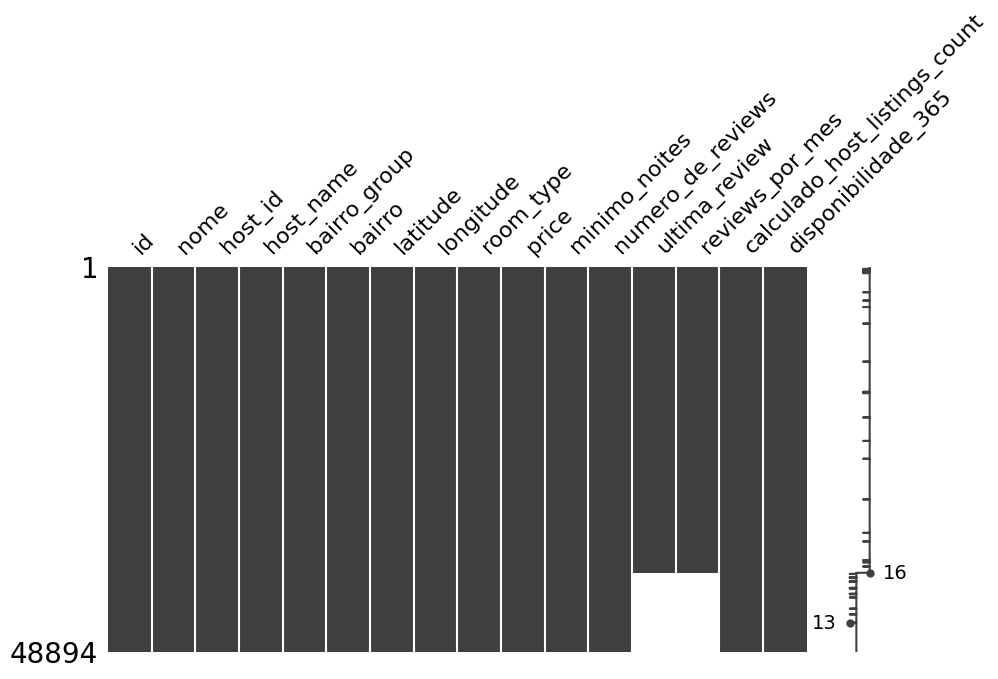

In [226]:
# Plotando o gráfico de missing values do dataset original
matrix = host.sort_values('reviews_por_mes')
msno.matrix(matrix, figsize=(10, 5))

Observado uma correlação direta de valores nulos de reviews_por_mes e ultima_reviews.

In [227]:
# Calculando a quantidade de valores iguais a zero na disponibilidade_365

dispobibilidade_zeros = (numericos['disponibilidade_365'] == 0).sum()
print('Número de valores 0 em disponibilidade_365: {}'.format(dispobibilidade_zeros))
# calculando a porcentagem de valores iguais a zero na disponibilidade_365
disponibility_zero_percent = (dispobibilidade_zeros / numericos.shape[0]) * 100
print('Porcentagem de valores 0 em disponibilidade_365: {:.2f}%'.format(disponibility_zero_percent))
print('\n')
price_zero = (numericos['price'] == 0).sum()
price_zero_percent = (price_zero / numericos.shape[0])*100
print('Número de valores 0 em preço: {}'.format(price_zero))
print ('Porcentagem de valores 0 em price: {:.2f}%'.format(price_zero_percent))

Número de valores 0 em disponibilidade_365: 17533
Porcentagem de valores 0 em disponibilidade_365: 35.86%


Número de valores 0 em preço: 11
Porcentagem de valores 0 em price: 0.02%


Vou calcular a média,mediana e moda das features com valores nulos para posteriormente fazermos os inputs.

In [228]:
# Vamos calcular a média, mediana e moda de ultima_review, reviews_por_mes, numero_de_reviews e Disponibilidade_365



# Não Categórico
mean_last_review = numericos['reviews_por_mes'].mean()
median_ultima_review = numericos['reviews_por_mes'].median()
mode_ultima_review = numericos['reviews_por_mes'].mode()
print('Média de reviews_por_mes: {:.2f}'.format(mean_last_review))
print('Mediana de reviews_por_mes: {:.2f}'.format(median_ultima_review))
print('Moda de reviews_por_mes: {:.2f}'.format(mode_ultima_review[0]))
print('\n')
mean_numero_de_reviews = numericos['numero_de_reviews'].mean()
median_numero_de_reviews = numericos['numero_de_reviews'].median()
mode_numero_de_reviews = numericos['numero_de_reviews'].mode()
print('Média de numero_de_reviews: {:.2f}'.format(mean_numero_de_reviews))
print('Mediana de numero_de_reviews: {:.2f}'.format(median_numero_de_reviews))
print('Moda de numero_de_reviews: {:.2f}'.format(mode_numero_de_reviews[0]))

mean_disponibilidade_365 = numericos['disponibilidade_365'].mean()
median_disponibilidade_365 = numericos['disponibilidade_365'].median()
mode_disponibilidade_365 = numericos['disponibilidade_365'].mode()
print('\n')
print('Média de disponibilidade_dias_365: {:.2f}'.format(mean_disponibilidade_365))
print('Mediana de disponibilidade_dias_365: {:.2f}'.format(median_disponibilidade_365))
print('Moda de disponibilidade_dias_365: {:.2f}'.format(mode_disponibilidade_365[0]))

# Vamos calcular a média, mediana e moda de preço
mean_price = numericos['price'].mean()
median_price = numericos['price'].median()
mode_price = numericos['price'].mode()
print('\n')
print('Média de preço: {:.2f}'.format(mean_price))
print('Mediana de preço: {:.2f}'.format(median_price))
print('Moda de preço: {:.2f}'.format(mode_price[0]))

# Vamos calcular a média , mediana e moda de reviews_por_mes
mean_reviews_por_mes = numericos['reviews_por_mes'].mean()
median_reviews_por_mes = numericos['reviews_por_mes'].median()
mode_reviews_por_mes = numericos['reviews_por_mes'].mode()
print('\n')
print('Média de reviews_por_mes: {:.2f}'.format(mean_reviews_por_mes))
print('Mediana de reviews_por_mes: {:.2f}'.format(median_reviews_por_mes))
print('Moda de reviews_por_mes: {:.2f}'.format(mode_reviews_por_mes[0]))


Média de reviews_por_mes: 1.37
Mediana de reviews_por_mes: 0.72
Moda de reviews_por_mes: 0.02


Média de numero_de_reviews: 23.27
Mediana de numero_de_reviews: 5.00
Moda de numero_de_reviews: 0.00


Média de disponibilidade_dias_365: 112.78
Mediana de disponibilidade_dias_365: 45.00
Moda de disponibilidade_dias_365: 0.00


Média de preço: 152.72
Mediana de preço: 106.00
Moda de preço: 100.00


Média de reviews_por_mes: 1.37
Mediana de reviews_por_mes: 0.72
Moda de reviews_por_mes: 0.02


# Manipulando e Preparando os dados
- Imputando valores ausentes e nulos
    - Features categóricas
    - Features não categóricas
- Diagnosticar e tratar Outliers
- Transformação de dados

In [229]:
# Inputar valores nulos da feature ultima_review que é categórica com a moda


categoricos_input = categoricos.copy()

modal_ultima_review = categoricos_input['ultima_review'].mode()[0]
categoricos_input['ultima_review']= categoricos_input['ultima_review'].fillna(modal_ultima_review)

# Verificar se os valores nulos foram inputados
print(categoricos_input.isnull().sum())

nome             16
host_name        21
bairro_group      0
bairro            0
room_type         0
ultima_review     0
dtype: int64


In [230]:
# Inputar valores nulos da feature numero_de_review e reviews_por_mes que é numérica com a mediana

numericos_views_input = numericos.copy()


numericos_views_input['numero_de_reviews']= numericos_views_input['numero_de_reviews'].fillna(median_numero_de_reviews)
numericos_views_input['reviews_por_mes']= numericos_views_input['reviews_por_mes'].fillna(median_reviews_por_mes)


# Verificar se os valores nulos foram inputados
print(numericos_views_input.isnull().sum())
print('\n')
numericos_views_input.head()

id                               0
host_id                          0
latitude                         0
longitude                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64




,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
1,3647,4632,40.80902,-73.94190,150,3,0,0.72,1,365
2,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
3,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
4,5099,7322,40.74767,-73.97500,200,3,74,0.59,1,129


Posteriormente no código foi feito um boxplot e constatado a presença outliers em número de reviews e reviews por mês. Então foi escolhido nessa etapa a inputação dos valores pela mediana que é menos sensível a outliers.

Os valores nulos foram substituidos, porém notamos que em algumas linhas a feature reviews_por_mes é maior que zero mesmo com o número de reviews sendo igual a zero, o que indica uma inconsistência nos dados. Vamos fazer uma expressão booleana para corrigir este erro, inputando valor zero nos reviews_por_mes.

In [231]:
linhas_selecionadas = numericos_views_input[(numericos_views_input['numero_de_reviews'] == 0) & (numericos_views_input['reviews_por_mes'] > 0)]

quantidade_linhas = len(linhas_selecionadas)

# Exibir a quantidade de linhas
print("Quantidade de linhas que atendem à condição:", quantidade_linhas)
print('\n)')
# Substituir valores de 'reviews_por_mes' por zero nas linhas onde 'numero_de_reviews' é igual a zero
numericos_views_input.loc[numericos_views_input['numero_de_reviews'] == 0, 'reviews_por_mes'] = 0
linhas_zero_zero = numericos_views_input[(numericos_views_input['numero_de_reviews'] == 0) & (numericos_views_input['reviews_por_mes'] == 0)]


Quantidade de linhas que atendem à condição: 10052

)


In [232]:

numericos_price_input = numericos_views_input.copy()

# Substituir os valores iguais a zero pela mediana
numericos_price_input['price'] = numericos_price_input['price'].replace(0, median_price)

# Verificar se os valores iguais a zero foram substituídos
print('Número de valores 0 em price: {}'.format((numericos_price_input['price'] == 0).sum()))

Número de valores 0 em price: 0


Primeiramente foi imputado a disponibilidade_365 com a média por não ter presença de muitos outliers e para não afetar a distribuição estatística, porém desta  forma a correlação com o preço ficou mais fraca, então optei pela imputação com a mediana e a correlação melhorou. Imputei Price com a mediana devido a presença de outliers.

In [233]:
# inputar valores iguais a zero em disponibilidade_365 com a média
numericos_365_input = numericos_price_input.copy()
numericos_365_input['disponibilidade_365'] = numericos_365_input['disponibilidade_365'].replace(0, median_disponibilidade_365)

print('Número de valores 0 em disponibilidade_365: {}'.format((numericos_365_input['disponibilidade_365'] == 0).sum()))
#Novo dataset com as copias de todas inputações dos numéricos
host_numericos = numericos_365_input.copy()

Número de valores 0 em disponibilidade_365: 0


In [234]:
#concatenar os dados categóricos e numéricos
host_input = pd.concat([categoricos_input, host_numericos], axis=1)
host_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nome                           48878 non-null  object 
 1   host_name                      48873 non-null  object 
 2   bairro_group                   48894 non-null  object 
 3   bairro                         48894 non-null  object 
 4   room_type                      48894 non-null  object 
 5   ultima_review                  48894 non-null  object 
 6   id                             48894 non-null  int64  
 7   host_id                        48894 non-null  int64  
 8   latitude                       48894 non-null  float64
 9   longitude                      48894 non-null  float64
 10  price                          48894 non-null  int64  
 11  minimo_noites                  48894 non-null  int64  
 12  numero_de_reviews              48894 non-null 

### Diagnosticar e tratar Outliers usando a Regra empírica


<ipython-input-235-deb3616ff7f1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=host_input, y=feature, palette="muted", ax=axes[0,i])
<ipython-input-235-deb3616ff7f1>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_outliers, y=feature, palette="muted", ax=axes[1,i])
<ipython-input-235-deb3616ff7f1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=host_input, y=feature, palette="muted", ax=axes[0,i])
<ipython-input-235-deb3616ff7f1>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated an

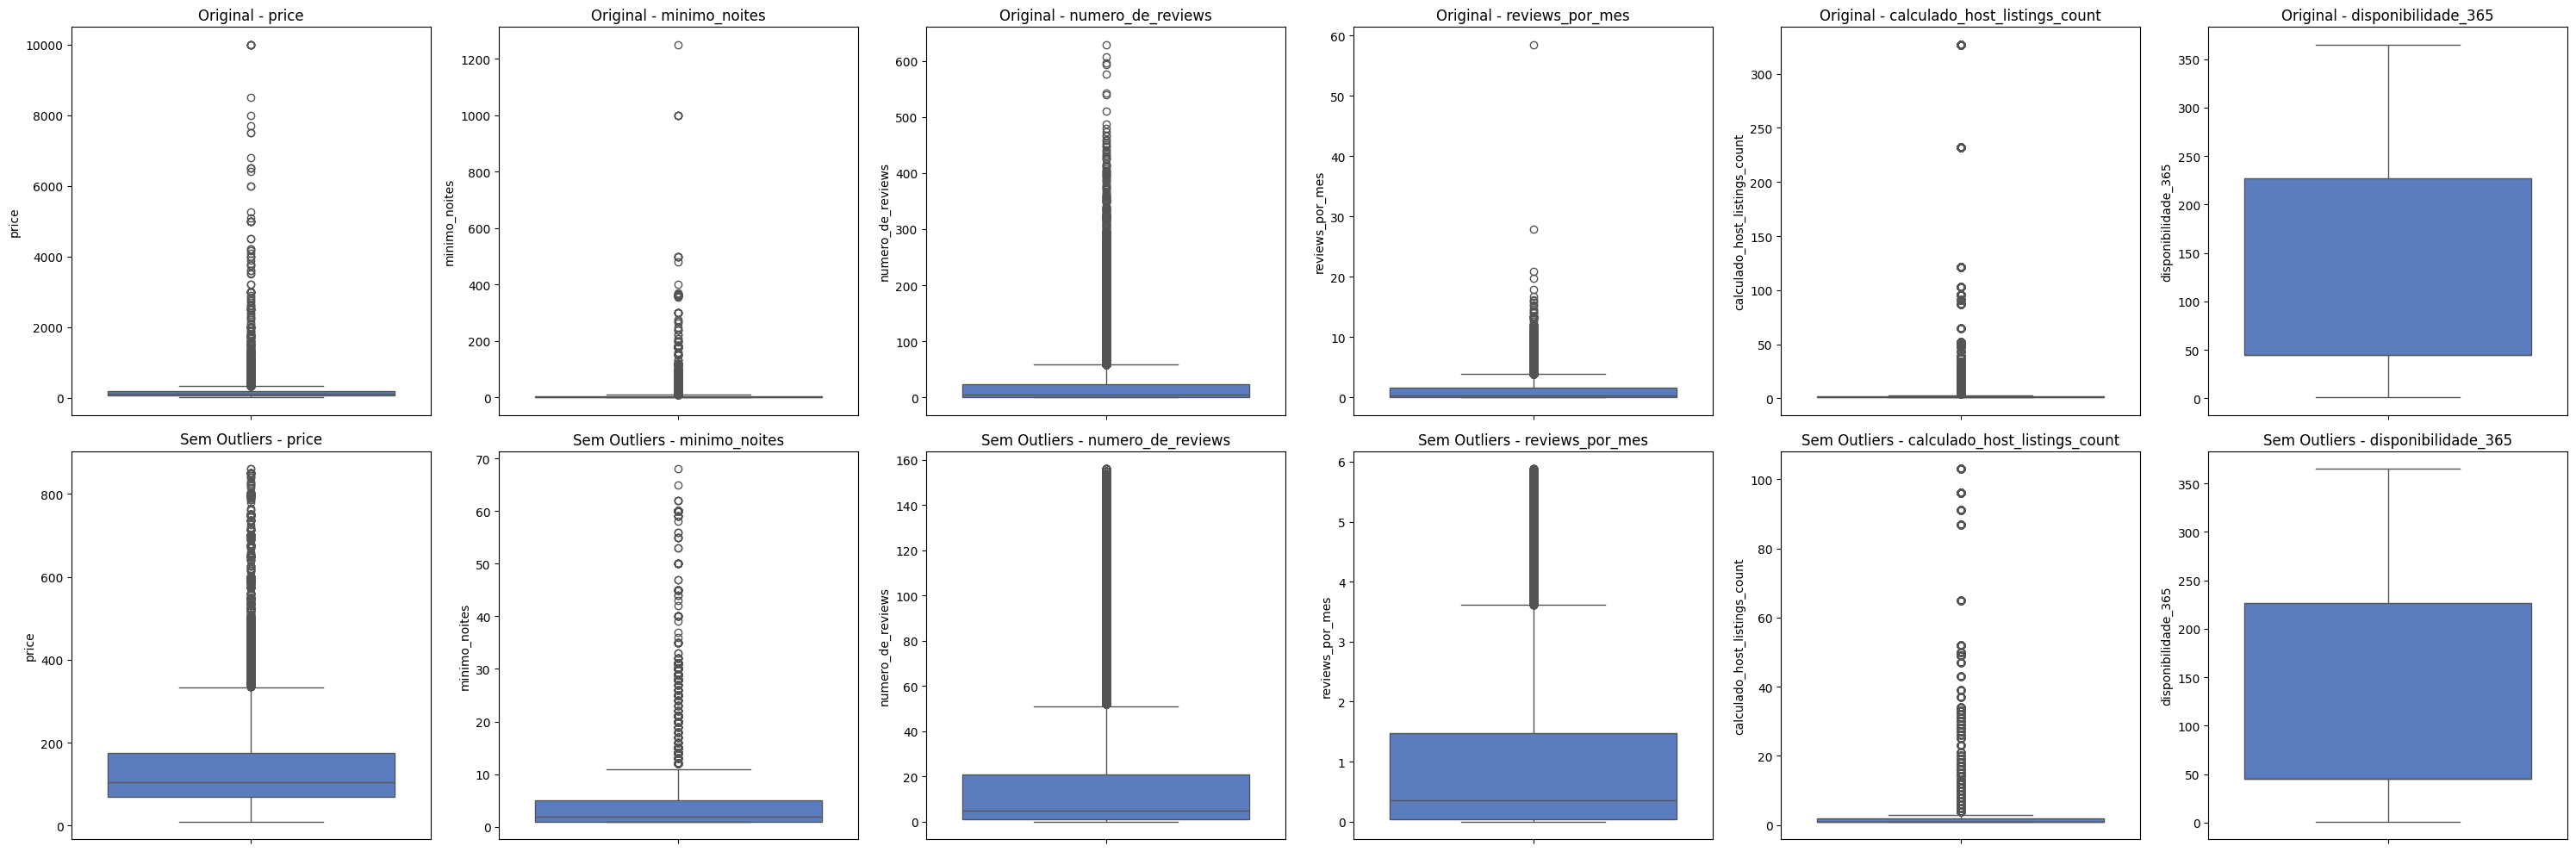

In [235]:
def drop_outliers_3std_multi(df, columns):
    df2 = df.copy()

    for column in columns:
        m = df2[column].mean()
        sd = df2[column].std()
        upper = m + 3*sd
        lower = m - 3*sd

        i_up = df2[df2[column] > upper].index
        i_lo = df2[df2[column] < lower].index

        df2.drop(i_up, axis=0, inplace=True)
        df2.drop(i_lo, axis=0, inplace=True)

    return df2

# Lista de features que você deseja incluir no gráfico
features_to_plot = ['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']


num_cols = len(features_to_plot)

# Criar subplots
fig, axes = plt.subplots(ncols=num_cols, nrows=2, figsize=(5*num_cols, 10))


for i, feature in enumerate(features_to_plot):
    # Boxplot Original
    sns.boxplot(data=host_input, y=feature, palette="muted", ax=axes[0,i])
    axes[0,i].set_title(f"Original - {feature}")

    # Remover outliers usando drop_outliers_3std_multi
    df_without_outliers = drop_outliers_3std_multi(host_input, columns=[feature])

    # Boxplot Sem Outliers
    sns.boxplot(data=df_without_outliers, y=feature, palette="muted", ax=axes[1,i])
    axes[1, i].set_title(f"Sem Outliers - {feature}")


plt.tight_layout()
plt.show()


Identificado uma presença muito forte de outliers na maior parte das features.

In [236]:
# Dropando os outliers das features que apresentaram mais outliers
columns_to_drop_outliers = ['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes','calculado_host_listings_count',]

df_without_outliers_multi = drop_outliers_3std_multi(host_input, columns=columns_to_drop_outliers)

df_without_outliers_multi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45483 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nome                           45468 non-null  object 
 1   host_name                      45464 non-null  object 
 2   bairro_group                   45483 non-null  object 
 3   bairro                         45483 non-null  object 
 4   room_type                      45483 non-null  object 
 5   ultima_review                  45483 non-null  object 
 6   id                             45483 non-null  int64  
 7   host_id                        45483 non-null  int64  
 8   latitude                       45483 non-null  float64
 9   longitude                      45483 non-null  float64
 10  price                          45483 non-null  int64  
 11  minimo_noites                  45483 non-null  int64  
 12  numero_de_reviews              45483 non-null 

In [237]:
# Crie uma cópia do DataFrame df_without_outliers_multi
df_catego_num = df_without_outliers_multi.copy()

# Verifique as informações do novo DataFrame
df_catego_num.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45483 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nome                           45468 non-null  object 
 1   host_name                      45464 non-null  object 
 2   bairro_group                   45483 non-null  object 
 3   bairro                         45483 non-null  object 
 4   room_type                      45483 non-null  object 
 5   ultima_review                  45483 non-null  object 
 6   id                             45483 non-null  int64  
 7   host_id                        45483 non-null  int64  
 8   latitude                       45483 non-null  float64
 9   longitude                      45483 non-null  float64
 10  price                          45483 non-null  int64  
 11  minimo_noites                  45483 non-null  int64  
 12  numero_de_reviews              45483 non-null 

Mais de 3 mil linhas do nosso dataset foram dropadas devido aos outliers.

Text(7700.0, 2889.915, 'kurt = 585.75')

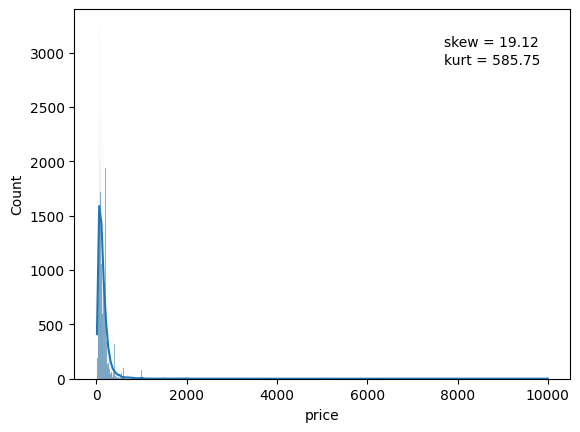

In [238]:
col = 'price'
skw = host_numericos[col].skew()
krt = host_numericos[col].kurt()
max_x = host_numericos[col].max()
g = sns.histplot(host_numericos[col],kde=True);
max_y = g.get_ylim()[1]
plt.text(0.77*max_x,0.9*max_y,f"skew = {skw:0.2f}")
plt.text(0.77*max_x,0.85*max_y,f"kurt = {krt:0.2f}")



Text(662.2, 2428.4925000000003, 'kurt = 9.00')

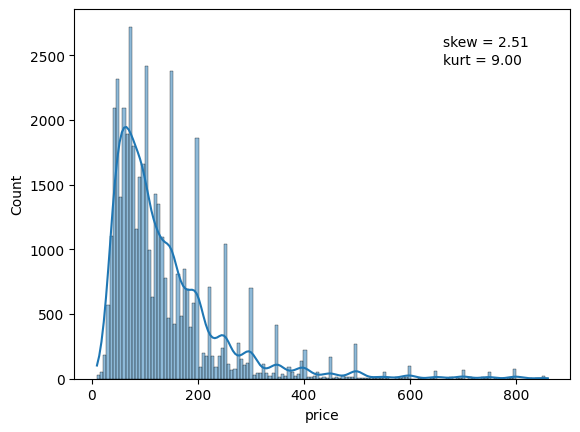

In [239]:
col = 'price'
skw = df_without_outliers_multi[col].skew()
krt = df_without_outliers_multi[col].kurt()
max_x = df_without_outliers_multi[col].max()
g = sns.histplot(df_without_outliers_multi[col],kde=True);
max_y = g.get_ylim()[1]
plt.text(0.77*max_x,0.9*max_y,f"skew = {skw:0.2f}")
plt.text(0.77*max_x,0.85*max_y,f"kurt = {krt:0.2f}")

Diferença da assimetria e curtosi com e sem os outliers

# Análise Exploratória de Dados (EDA)

### Objetivos:
- Definir os atributos mais adequados.
- Encontrar padrões
- Validar resultados.
- Refinar Features que serão utilizados para ML

 Foi realizado a transformação logarítmica, porém esta não gerou bons resultados de correlação e score. Optei por tirar do notebook para deixar a resolução do desafio mais objetiva.

In [240]:
df_without_outliers_multi = df_without_outliers_multi.drop(['latitude','longitude','id','host_id'], axis=1)
#df_without_out_object = df_without_outliers_multi.select_dtypes(exclude='object')

In [241]:
correlation_drop_out = df_without_outliers_multi.corr()
correlation_drop_out['price'].sort_values(ascending=False)

<ipython-input-241-5b1baac23fef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_drop_out = df_without_outliers_multi.corr()


price                            1.000000
disponibilidade_365              0.092545
calculado_host_listings_count    0.044119
minimo_noites                    0.011483
reviews_por_mes                 -0.032093
numero_de_reviews               -0.037522
Name: price, dtype: float64

### As correlações das features pelos preço:
- Disponibilidade ao longo do ano pode indicar que os imóveis que estão mais disponíveis pelo seu locador possuem um preço maior.
- Quantidade de anúncios do host
- As reviews apresentaram correlação negativa o que poderia indicar que os imóveis de maior preço não possuem uma grande quantidade de views, faz sentido por serem imóveis mais caros podem ter uma frequência de locação menor

Agora vamos transformar alguns dados categoricos que apresentaram potêncial para transformação com dummies, são eles : bairro_group, type_room e bairro.


In [242]:


# Criar um novo DataFrame
df_dummies = pd.DataFrame()

# Lista de features para criar dummy
array_dum = ['room_type', 'bairro_group']

# Iterar sobre as features selecionadas
for dummie in array_dum:
    # Gerar as variáveis dummy
    lista_dum = pd.get_dummies(df_without_outliers_multi[dummie], prefix=dummie)

    # Adicionar as variáveis dummy ao novo DataFrame
    df_dummies = pd.concat([df_dummies, lista_dum], axis=1)

# Adicionar as variáveis dummy de 'bairro' ao novo DataFrame
bairro_dummies = pd.get_dummies(df_without_outliers_multi['bairro'], prefix='bairro')
df_dummies = pd.concat([df_dummies, bairro_dummies], axis=1)

# Exibir o novo DataFrame com variáveis dummy
print("Novo DataFrame com variáveis dummy:")
print(df_dummies.head())



Novo DataFrame com variáveis dummy:
   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  \
0                          1                       0                      0   
1                          0                       1                      0   
3                          1                       0                      0   
4                          1                       0                      0   
5                          0                       1                      0   

   bairro_group_Bronx  bairro_group_Brooklyn  bairro_group_Manhattan  \
0                   0                      0                       1   
1                   0                      0                       1   
3                   0                      0                       1   
4                   0                      0                       1   
5                   0                      1                       0   

   bairro_group_Queens  bairro_group_Staten Island  bair

In [243]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45483 entries, 0 to 48893
Columns: 229 entries, room_type_Entire home/apt to bairro_Woodside
dtypes: uint8(229)
memory usage: 10.3 MB


In [244]:
# Converter todas as variáveis dummy para tipo int
columns_to_convert_int = df_dummies.columns[df_dummies.columns.str.startswith('result_')]

# Iterar sobre todas as variáveis dummy
for column in columns_to_convert_int:
    df_dummies[column] = df_dummies[column].astype(int)

# Converter todas as colunas de tipo uint8 para int
uint8_columns = df_dummies.select_dtypes(include='uint8').columns
df_dummies[uint8_columns] = df_dummies[uint8_columns].astype(int)

# Identificar todas as colunas de tipo booleano
boolean_columns = df_dummies.select_dtypes(include='bool').columns

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45483 entries, 0 to 48893
Columns: 229 entries, room_type_Entire home/apt to bairro_Woodside
dtypes: int64(229)
memory usage: 79.8 MB


In [245]:
# Encontrar os 50 bairros mais frequentes
top_50_bairros = df_without_outliers_multi['bairro'].value_counts().head(50)

# Imprimir os 50 bairros mais frequentes
print("Os 50 bairros mais frequentes:")
print(top_50_bairros)


Os 50 bairros mais frequentes:
Williamsburg                 3733
Bedford-Stuyvesant           3498
Harlem                       2525
Bushwick                     2356
Upper West Side              1833
East Village                 1735
Hell's Kitchen               1725
Upper East Side              1697
Crown Heights                1505
Midtown                      1393
Greenpoint                   1086
East Harlem                  1038
Chelsea                       978
Astoria                       861
Washington Heights            861
Lower East Side               856
West Village                  708
Flatbush                      604
Clinton Hill                  542
Long Island City              513
Prospect-Lefferts Gardens     508
Park Slope                    476
Fort Greene                   473
East Flatbush                 472
Financial District            471
Kips Bay                      432
Murray Hill                   412
Ridgewood                     408
Flushing         

In [246]:
# Adicione a coluna 'price' de df_without_outliers_multi a df_dummies
#df_dummies['price'] = df_without_outliers_multi['price']

# Adicione todas as colunas numéricas de df_without_outliers_multi a df_dummies
df_dummies = pd.concat([df_dummies, df_without_outliers_multi.select_dtypes(include='number')], axis=1)

# Calcular as correlações absolutas entre as variáveis dummy de 'bairro' e 'price'
correlacoes_absolutas_bairro = df_dummies.corr().abs()['price']


negativos = correlacoes_absolutas_bairro[correlacoes_absolutas_bairro < 0].sort_values(ascending=True)
positivos = correlacoes_absolutas_bairro[correlacoes_absolutas_bairro > 0].sort_values(ascending=False)


print("Correlações absolutas negativas:")
print(negativos)


print("Correlações absolutas positivas:")
print(positivos)




Correlações absolutas negativas:
Series([], Name: price, dtype: float64)
Correlações absolutas positivas:
price                        1.000000
room_type_Entire home/apt    0.498956
room_type_Private room       0.467740
bairro_group_Manhattan       0.286208
bairro_Midtown               0.206084
                               ...   
bairro_Bay Terrace           0.000456
bairro_Eltingville           0.000297
bairro_Castleton Corners     0.000176
bairro_Holliswood            0.000173
bairro_Unionport             0.000068
Name: price, Length: 235, dtype: float64


In [247]:


# Adiciona a coluna 'price' de df_without_outliers_multi a df_dummies
#df_dummies['price'] = df_without_outliers_multi['price']

# Calcular as correlações absolutas entre as variáveis dummy de 'bairro' e 'price'
correlacoes_absolutas_bairro = df_dummies.corr().abs()['price']

# Selecionar os 50 bairros mais frequentes com maior valor absoluto de correlação
top_50_correlacoes_bairro = correlacoes_absolutas_bairro.sort_values(ascending=False).head(50)

# Filtrar apenas as colunas correspondentes aos top 50 bairros
df_top_50_dummies = df_dummies[top_50_correlacoes_bairro.index]




Agora possuimos um ranking das correlações com os bairros por valor absoluto, distinguindo as correlações positivas que indicam um preço mais caro e negativa que indicam um preço menor.

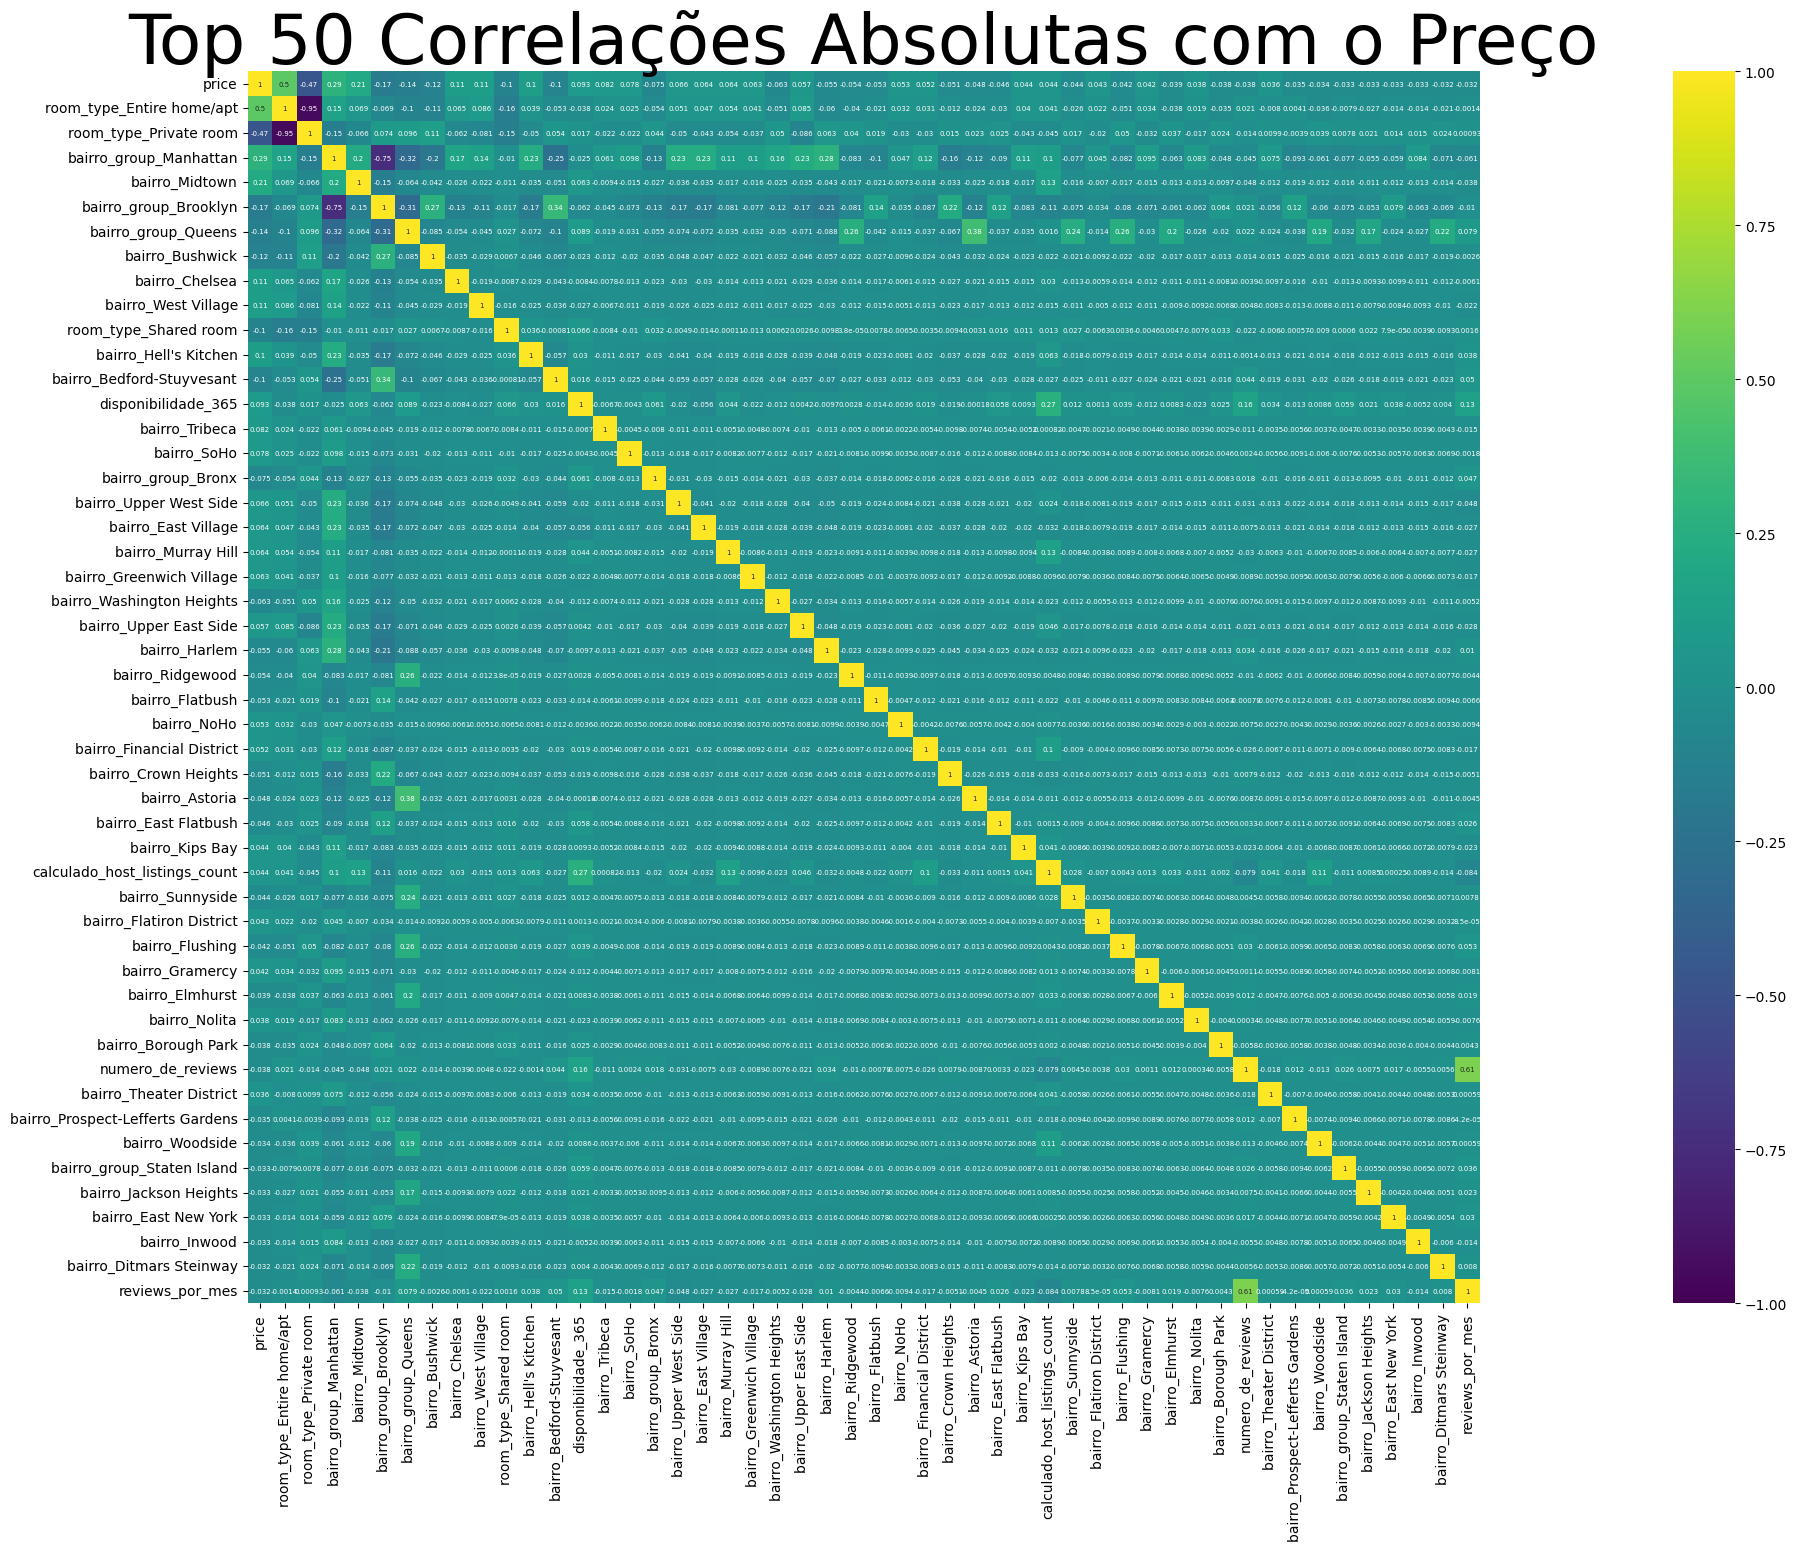

In [248]:
# Correlação entre as variáveis e o preço
correlation= df_top_50_dummies.corr()
correlation_with_price = correlation['price'].abs().sort_values(ascending=False)

# Selecionar as top 50 correlações
top_50_correlations = correlation.loc[correlation_with_price.index[:50], correlation_with_price.index[:50]]

# Plotar o top 50 das correlações
f, ax = plt.subplots(figsize=(50, 16))
plt.title('Top 50 Correlações Absolutas com o Preço', y=1, size=50)
sns.heatmap(top_50_correlations,
            square=True,
            vmin=-1.0,
            vmax=1.0,
            cmap='viridis',
            annot=True,  # Adiciona os valores de correlação
            annot_kws={"size": 5})  # Tamanho da fonte dos valores
plt.show()
plt.show()

Foi observado uma forte multicolinearidade de Mahatan com Brooklyn, Entire home/apt com Private room e número de reviews por reviews por mês.

Disponibilidade de dias por ano é a primeira feature numérica original com maior correlação com o preço.

Optaremos por manter as features com maior correlação com o preço.

Análise:
- Os tipos de locação total apresenta a correlação  mais forte com o preço, e o tipo private room apresenta uma correlação negativa. Faz sentindo essa relação pois a locação de um imóvel inteiro tende a ser fator determinante do preço.
- O grupo de bairro de Manhattan apresenta a terceira maior correlação com o preço e a maior parte das correlações  são pelas features dos bairros.
- Mínimo noites e host listening counts não apresentaram uma correlação forte com o preço.

### Vou começar a aplicar alguns modelos de treinamento.
- O primeiro modelo testado foi de regressão linear usando o sklearn por se tratar de um problema onde a variável da resposta é contínua. O  objetivo será modelar a relação entre as variáveis independentes (bairros,tipo de locação, etc..) e a variável de resposta (preço) para fazermos previsões ou entender a relação entre essas variáveis.
- A regressão linear utilizando o sklearn obteve um Score (R²): 0.3545050872196557
- O segundo modelo foi MLPRegressor, porém obtive dificuldade na hora de inverter a normalização de y para gerar o valor real da predição do preço.
- O terceiro modelo testado foi MLP usando Keras.
### Só irei deixar no notebook o modelo com o melhor desempenho para não poluir de mais o notebook.
### O modelo que mais se adequou para o treinamento foi a MLP do Keras.

Vamos aplicar aprendizado profundo

In [249]:
#MLP

#!pip install keras scikit-learn


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras.optimizers import Adam, RMSprop

In [250]:
X = df_top_50_dummies.drop(['price','reviews_por_mes','room_type_Private room','bairro_group_Brooklyn'], axis=1)
y = df_top_50_dummies['price']

In [251]:
# Inicializando o min-max
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))



X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.30, random_state=40)

In [252]:
# Modelo escolhido
model = Sequential()
#layer 1
model.add(Dense(300, input_dim=46, activation='relu'))
model.add(Dropout(0.1))

# layer 2
model.add(Dense(150))
model.add(Activation('tanh'))
model.add(Dropout(0.1))

#layer 3
model.add(Dense(100))
model.add(Activation('linear'))
model.add(Dropout(0.1))

#layer 4
model.add(Dense(10))
model.add(LeakyReLU(alpha = 0.1))

#Output layer
model.add(Dense(1))
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 300)               14100     
                                                                 
 dropout_44 (Dropout)        (None, 300)               0         
                                                                 
 dense_77 (Dense)            (None, 150)               45150     
                                                                 
 activation_28 (Activation)  (None, 150)               0         
                                                                 
 dropout_45 (Dropout)        (None, 150)               0         
                                                                 
 dense_78 (Dense)            (None, 100)               15100     
                                                                 
 activation_29 (Activation)  (None, 100)             

In [213]:
model.compile(loss='mse',optimizer=RMSprop(0.005), metrics=['mse','mae'])
my_model = model.fit(X_train, y_train, epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
995/995 [==============================] - 7s 6ms/step - loss: 0.0187 - mse: 0.0187 - mae: 0.0696 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0583
Epoch 2/200
995/995 [==============================] - 6s 6ms/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0630 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0600
Epoch 3/200
995/995 [==============================] - 4s 4ms/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0625 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0582
Epoch 4/200
995/995 [==============================] - 5s 5ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0623 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0631
Epoch 5/200
995/995 [==============================] - 5s 5ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0622 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0614
Epoch 6/200
995/995 [==============================] - 5s 5ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0622 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0612
Epoch 7/20

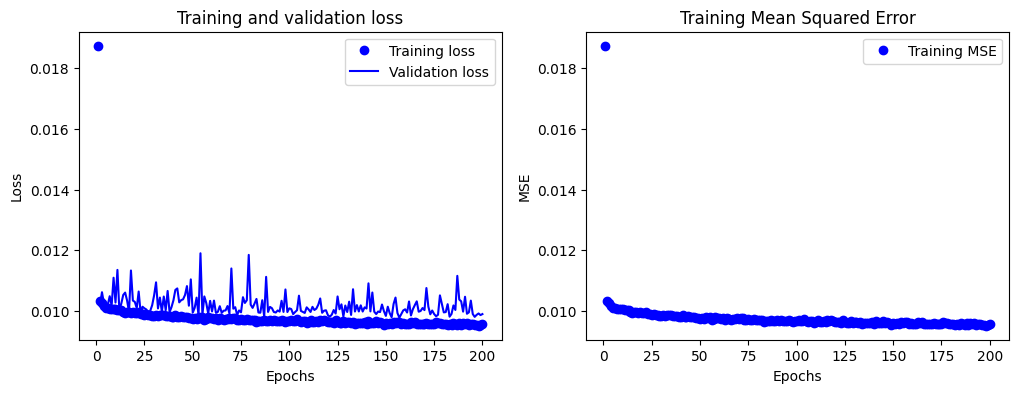

In [214]:
# Treinamento do modelo
history = my_model.history

# Extraindo as métricas
loss = history['loss']
val_loss = history['val_loss']
mse = history['mse']
mae = history['mae']

# Número de épocas
epochs = range(1, len(loss) + 1)

# Visualizando a perda
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Visualizando o erro quadrático médio
plt.subplot(1, 2, 2)
plt.plot(epochs, mse, 'bo', label='Training MSE')
plt.title('Training Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.show()

Text(0.5, 0, 'Épocas')

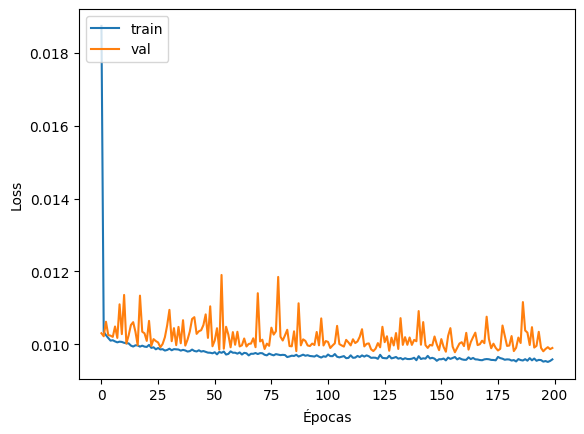

In [215]:
#scatter plot
plt.plot(my_model.history['loss'])
plt.plot(my_model.history['val_loss'])
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Épocas')

## Agora vamos fazer a predição pedida no exercício:
- Por nosso modelo não ter sido treinado com todas as chaves que foram informado no dicionário, iremos eliminar as ausentes para o modelo poder gerar a prediçaõ do alvo.
- Lembrando que nem todas essas features foram utilizadas no nosso modelo. mais abaixo tem as instruções de como usar.
### Dicionário do exercício:
{'id': 2595,

 'nome': 'Skylit Midtown Castle',

 'host_id': 2845,

 'host_name': 'Jennifer',

 'bairro_group': 'Manhattan',

 'bairro': 'Midtown',

 'latitude': 40.75362,

 'longitude': -73.98377,

 'room_type': 'Entire home/apt',

 'price': 225,

 'minimo_noites': 1,

 'numero_de_reviews': 45,

 'ultima_review': '2019-05-21',

 'reviews_por_mes': 0.38,

 'calculado_host_listings_count': 2,

 'disponibilidade_365': 355}

In [217]:
import pickle

# Salvar o modelo e os escaladores em arquivo
with open('mlp_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler_X.pkl', 'wb') as scaler_X_file:
    pickle.dump(scaler_X, scaler_X_file)

with open('scaler_y.pkl', 'wb') as scaler_y_file:
    pickle.dump(scaler_y, scaler_y_file)


In [ ]:
# Carregar o modelo e os escaladores do arquivo
with open('mlp_model.pkl', 'rb') as model_file:
    modelo_carregado = pickle.load(model_file)

with open('scaler_X.pkl', 'rb') as scaler_X_file:
    scaler_X_carregado = pickle.load(scaler_X_file)

with open('scaler_y.pkl', 'rb') as scaler_y_file:
    scaler_y_carregado = pickle.load(scaler_y_file)


In [44]:
###################### DOCUMENTAÇÃO DE INPUT DAS CHAVES PARA PREVISÃO DO PREÇO DO IMÓVEL #########################

# Room_type preencha 1  em room_type entire home/apt caso o aluguel seja do imóvel completo e 0 caso não seja.
# Room_type preencha 1  em room_type shared caso o aluguel seja de quarto compartilhado 0 caso não seja.
# Bairro_group preencha 1 para se o imóvel está localizado nesse bairro_group e 0 caso ele não esteja.
# Bairro preencha 1 caso o imóvel esteja neste bairro e 0 caso não esteja
# Disponibilidade 365_ preencha a quantidade de dias que o imóvel está disponível por ano
# Calculado host_listening_counts preencha com a quantidade de anuncios do imóvel
# Numero_de_reviews preencha com a quantidade de avaliações que o imóvel tem.

################ PREENCHA ABAIXO ##############
entrada_zeros = {
    'room_type_Entire home/apt': 1,
    'bairro_group_Manhattan': 1,
    'bairro_Midtown': 1,
    'bairro_group_Queens': 0,
    'bairro_Bushwick': 0,
    'bairro_Chelsea': 0,
    'room_type_Shared room':0,
    'bairro_West Village': 0,
    "bairro_Hell's Kitchen": 0,
    'bairro_Bedford-Stuyvesant': 0,
    'disponibilidade_365': 355,
    'bairro_Tribeca': 0,
    'bairro_SoHo': 0,
    'bairro_group_Bronx': 0,
    'bairro_Upper West Side': 0,
    'bairro_East Village': 0,
    'bairro_Murray Hill': 0,
    'bairro_Greenwich Village': 0,
    'bairro_Washington Heights': 0,
    'bairro_Upper East Side': 0,
    'bairro_Harlem': 0,
    'bairro_Ridgewood': 0,
    'bairro_Flatbush': 0,
    'bairro_NoHo': 0,
    'bairro_Financial District': 0,
    'bairro_Crown Heights': 0,
    'bairro_Astoria': 0,
    'bairro_East Flatbush': 0,
    'bairro_Kips Bay': 0,
    'calculado_host_listings_count': 2,
    'bairro_Sunnyside': 0,
    'bairro_Flatiron District': 0,
    'bairro_Flushing': 0,
    'bairro_Gramercy': 0,
    'bairro_Elmhurst': 0,
    'bairro_Nolita': 0,
    'bairro_Borough Park': 0,
    'numero_de_reviews': 45,
    'bairro_Theater District': 0,
    'bairro_Prospect-Lefferts Gardens': 0,
    'bairro_Woodside': 0,
    'bairro_group_Staten Island': 0,
    'bairro_Jackson Heights': 0,
    'bairro_East New York': 0,
    'bairro_Inwood': 0,
    'bairro_Ditmars Steinway': 0
}

# Sequência das Colunas
sequencia_colunas = ['room_type_Entire home/apt', 'bairro_group_Manhattan', 'bairro_Midtown', 'bairro_group_Queens', 'bairro_Bushwick', 'bairro_Chelsea', 'bairro_West Village', 'room_type_Shared room', "bairro_Hell's Kitchen", 'bairro_Bedford-Stuyvesant', 'disponibilidade_365', 'bairro_Tribeca', 'bairro_SoHo', 'bairro_group_Bronx', 'bairro_Upper West Side', 'bairro_East Village', 'bairro_Murray Hill', 'bairro_Greenwich Village', 'bairro_Washington Heights', 'bairro_Upper East Side', 'bairro_Harlem', 'bairro_Ridgewood', 'bairro_Flatbush', 'bairro_NoHo', 'bairro_Financial District', 'bairro_Crown Heights', 'bairro_Astoria', 'bairro_East Flatbush', 'bairro_Kips Bay', 'calculado_host_listings_count', 'bairro_Sunnyside', 'bairro_Flatiron District', 'bairro_Flushing', 'bairro_Gramercy', 'bairro_Elmhurst', 'bairro_Nolita', 'bairro_Borough Park', 'numero_de_reviews', 'bairro_Theater District', 'bairro_Prospect-Lefferts Gardens', 'bairro_Woodside', 'bairro_group_Staten Island', 'bairro_Jackson Heights', 'bairro_East New York', 'bairro_Inwood', 'bairro_Ditmars Steinway']

# Criar DataFrame na sequência
entrada_zeros_df = pd.DataFrame([entrada_zeros], columns=sequencia_colunas)


In [ ]:
nomes_colunas = list(X)
print(nomes_colunas)

['room_type_Entire home/apt', 'bairro_group_Manhattan', 'bairro_Midtown', 'bairro_group_Queens', 'bairro_Bushwick', 'bairro_Chelsea', 'bairro_West Village', 'room_type_Shared room', "bairro_Hell's Kitchen", 'bairro_Bedford-Stuyvesant', 'disponibilidade_365', 'bairro_Tribeca', 'bairro_SoHo', 'bairro_group_Bronx', 'bairro_Upper West Side', 'bairro_East Village', 'bairro_Murray Hill', 'bairro_Greenwich Village', 'bairro_Washington Heights', 'bairro_Upper East Side', 'bairro_Harlem', 'bairro_Ridgewood', 'bairro_Flatbush', 'bairro_NoHo', 'bairro_Financial District', 'bairro_Crown Heights', 'bairro_Astoria', 'bairro_East Flatbush', 'bairro_Kips Bay', 'calculado_host_listings_count', 'bairro_Sunnyside', 'bairro_Flatiron District', 'bairro_Flushing', 'bairro_Gramercy', 'bairro_Elmhurst', 'bairro_Nolita', 'bairro_Borough Park', 'numero_de_reviews', 'bairro_Theater District', 'bairro_Prospect-Lefferts Gardens', 'bairro_Woodside', 'bairro_group_Staten Island', 'bairro_Jackson Heights', 'bairro_Ea

In [216]:



entrada_normalizada = scaler_X.transform(entrada_zeros_df)


previsao_preco_scaled = model.predict(entrada_normalizada)


previsao_preco = scaler_y.inverse_transform(previsao_preco_scaled)


print(f"Sugestão de preço original: ${previsao_preco[0][0]:.2f}")





1/1 [==============================] - 0s 77ms/step
Sugestão de preço original: $261.22


### Sugestão de preço do nosso modelo:

- Sugestão de preço: $261.22

### Avaliação da Mult-layer Perceptron
- Foi realizado o treino do alvo sem estar normalizado porém este apresentou um resultado muito negativo de perda, mse e mea.
- O alvo foi normalizado no treino, porém apresentou uma tendência a overfitting, para atenuar este problema foi diminuido a capacidade de aprendizado de 0.01 para 0.005
- Devido a disponibilidade do tempo não realizei treinos que passassem de 300 épocas.
- O último modelo ficou com 200 épocas
- Métricas (quanto mais próximo de 0 melhor) :
  - loss: 0.0096 - mse: 0.0096 - mae: 0.0607 - val_loss: 0.0099 -
    val_mse: 0.0099 - val_mae: 0.0569
- Funções de ativação : relu,linear,tanh e leakrelu.


### Nosso modelo de predição parou por aqui porém vamos investigar algumas possíveis correlações que no momento ainda não serão incorporadas ao nosso modelo. São elas:
- Nome do anúncio/imóvel
  - Iremos fazer processamento de texto, vetorização e dummies para verificar correlações.
- latitude e longitude
  - Iremos fazer o cálculo da distância de alguns imóveis por um imóvel de referência que será o mais caro.


In [ ]:
!pip install nltk


In [253]:
#Importações necessárias
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [254]:
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    if pd.isnull(text):
        return ''
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()

    # Tokenização
    words = word_tokenize(text.lower())

    # Remoção de stop words e pontuações
    words = [ps.stem(word) for word in words if word.isalpha() and word not in stop_words]

    return ' '.join(words)

# Encontrar os 50 maiores valores da feature 'price' em ordem descendente
top_50_precos = df_catego_num.sort_values('price', ascending=False).head(50)

# Pré-processamento de texto nas observações com os 50 maiores preços
top_50_precos['texto_processado'] = top_50_precos['nome'].apply(preprocess_text)

# Contagem de frequência dos textos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(top_50_precos['texto_processado'])

df_frequencias = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [255]:
# Encontrar os 50 maiores valores da feature 'price' em ordem descendente
top_50_precos = df_catego_num.sort_values('price', ascending=False).head(50)

# Pré-processamento de texto nas observações com os 50 maiores preços
top_50_precos['texto_processado'] = top_50_precos['nome'].apply(preprocess_text)

# Contagem de frequência dos textos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(top_50_precos['texto_processado'])

# Cria um DataFrame com as contagens
df_frequencias = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Ordena o DataFrame pelo preço em ordem descendente
top_50_precos = top_50_precos.sort_values('price', ascending=False)

# Seleciona as 100 primeiras linhas do texto processado
primeiras_100_linhas = top_50_precos[['texto_processado', 'price']].head(100)

# Imprime as 100 primeiras linhas
print(primeiras_100_linhas)

# top 100 das palavras com maior frequência na feature 'nome' onde os preços são mais altos
frequencias_totais = df_frequencias.sum()

palavras_mais_frequentes = frequencias_totais.sort_values(ascending=False)

# Imprima as 100 palavras mais frequentes e suas contagens
top_palavras = palavras_mais_frequentes.head(100)
print(top_palavras)

# Selecione as top 100 palavras mais frequentes
top100_palavras = palavras_mais_frequentes.head(100).index.tolist()

# Cria variáveis dummy para as top 100 palavras-chave em 'nome'
top100_nome_dummies = top_50_precos['nome'].apply(preprocess_text).str.split(expand=True).stack().str.get_dummies().groupby(level=0).sum()[top100_palavras]

# Adiciona as variáveis dummy ao DataFrame principal
df_with_dummies = pd.concat([top_50_precos, top100_nome_dummies], axis=1)

# Calcula a matriz de correlação
correlation_matrix = df_with_dummies[['price'] + top100_palavras].corr()

# Obtém a correlação com a coluna 'price'
correlation_price = correlation_matrix['price']

# Filtra as correlações positivas maiores que 0
correlacoes_positivas = correlation_price[correlation_price > 0]

# Exibe as 10 palavras com maior correlação positiva
print("As 10 palavras com maior correlação positiva:")
print(correlacoes_positivas.sort_values(ascending=False).head(20))






                                    texto_processado  price
37340                    landmark limeston sanctuari    860
5350                       spaciou studio time squar    860
3634                   superbowl rental hell kitchen    850
27599                         design townhous harlem    850
45765                             flatiron loft star    850
36535                  entir suit breathtak view nyc    850
22585                                    gim shelter    850
661                      heart soul greenwich villag    850
12982                                 swing chandeli    850
19182                luxuri penthous hearth soho nyc    850
32937                    soho penthous sq ft ft ceil    850
28140            brand new bedroom bath downtown gem    850
28149       luxuri skylin view best panarom view nyc    850
3596                     superbowl bd ba w roof deck    850
29993              luxuri privat west villag townhom    850
45840                   beauti renov mod

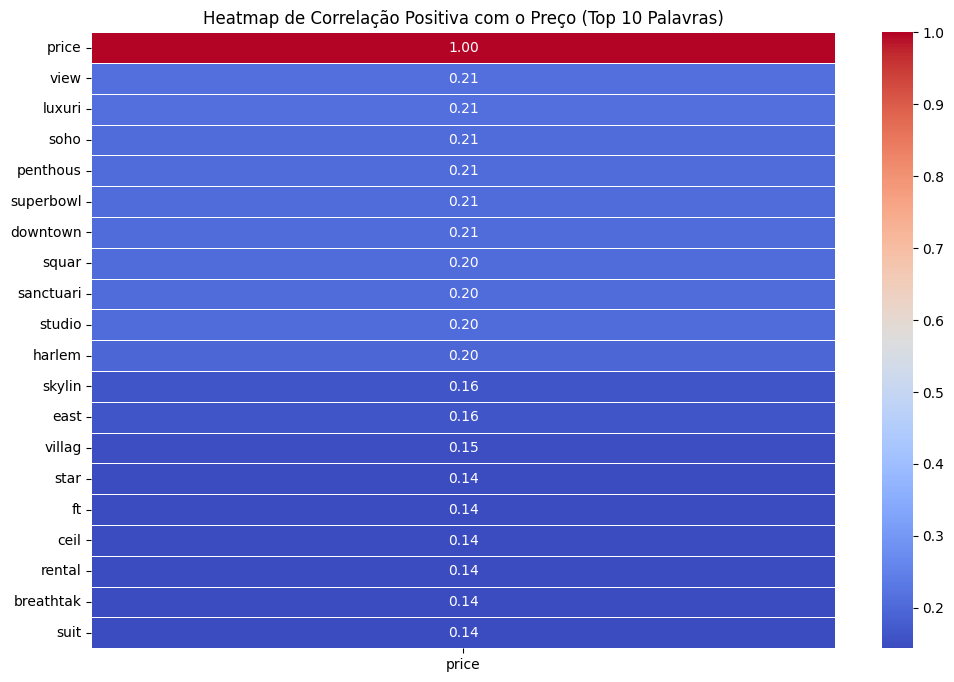

In [256]:
# Filtra as correlações positivas maiores que 0
correlacoes_positivas = correlation_price[correlation_price > 0]

# Seleciona as top 10 palavras positivas
top10_palavras_positivas = correlacoes_positivas.sort_values(ascending=False).head(20).index.tolist()

# Cria o heatmap apenas com as top 10 palavras positivas
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.loc[top10_palavras_positivas, ['price']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap de Correlação Positiva com o Preço (Top 10 Palavras)')
plt.show()

Observando as correlações com o preço dos textos mais frequentes nos anuncios de maior valor. Observamos que a maior parte das palavras são substantivos.

### Latitude e Longitude.

In [257]:
from math import radians, sin, cos, sqrt, atan2
from scipy.spatial import distance
# Cálculo da distância das latitudes
def calcular_distancia_geodesica(coord1, coord2):
    # Raio médio da Terra em quilômetros
    raio_terra_km = 6371.0

    # Converter coordenadas de graus para radianos
    lat1, lon1 = map(radians, coord1)
    lat2, lon2 = map(radians, coord2)

    # Diferenças de coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Distância em quilômetros
    distancia_km = raio_terra_km * c

    return distancia_km

# Escolher o imóvel mais caro do DataFrame
imovel_mais_caro = df_without_outliers.nlargest(1, 'price')
coordenadas_imovel_mais_caro = (imovel_mais_caro['latitude'].iloc[0], imovel_mais_caro['longitude'].iloc[0])

# Calcular as distâncias geodésicas de todos os imóveis em relação ao imóvel mais caro
df_without_outliers['distancia_ao_mais_caro'] = df_without_outliers.apply(
    lambda row: calcular_distancia_geodesica((row['latitude'], row['longitude']), coordenadas_imovel_mais_caro),
    axis=1
)
# escolher os 20 mais próximos
imoveis_mais_proximos = df_without_outliers.nsmallest(20,'distancia_ao_mais_caro')
# escolher os 20 imóveis mais distantes
imoveis_mais_distantes = df_without_outliers.nlargest(20, 'distancia_ao_mais_caro')

# Identificar o índice do imóvel mais caro nos imóveis mais próximos
indice_imovel_mais_caro = imoveis_mais_proximos[imoveis_mais_proximos['id'] == imovel_mais_caro.iloc[0]['id']].index

# Remover o imóvel mais caro dos imóveis mais próximos
imoveis_mais_proximos = imoveis_mais_proximos.drop(index=indice_imovel_mais_caro)
# Exibir os resultados
#for index, row in imoveis_mais_distantes.iterrows():
   # print(f"Imóvel mais distante do imóvel mais caro ({imovel_mais_caro.iloc[0]['id']}): {row['id']} - Distância: {row['distancia_ao_mais_caro']:.2f} km")




In [258]:
#Pegar imóveis baratos e caros

imoveis_mais_caros = df_without_outliers.nlargest(21, 'price').iloc[1:]
coordenadas_imoveis_mais_caros = list(zip(imoveis_mais_caros['latitude'], imoveis_mais_caros['longitude']))



imoveis_mais_baratos = df_without_outliers.nsmallest(20, 'price')
coordenadas_imoveis_mais_baratos = list(zip(imoveis_mais_baratos['latitude'], imoveis_mais_baratos['longitude']))




In [ ]:
! pip install folium


In [259]:
import folium
from folium import Marker

# Plotar o mapa

# Coordenadas do imóvel mais caro
coord_imovel_mais_caro = (df_without_outliers.loc[df_without_outliers['price'].idxmax()]['latitude'],
                          df_without_outliers.loc[df_without_outliers['price'].idxmax()]['longitude'])

# Criar um mapa centrado nas coordenadas do imóvel mais caro
mapa = folium.Map(location=coord_imovel_mais_caro, zoom_start=12)



# Adicionar marcadores para os 10 imóveis mais distantes com ícone azul
for index, row in imoveis_mais_distantes.iterrows():
    coord = (row['latitude'], row['longitude'])
    preco_imovel = row['price']
    popup_imovel = f"Imóvel {row['id']}\nDistância: {row['distancia_ao_mais_caro']:.2f} km\nPreço: ${preco_imovel:.2f}"
    folium.Marker(location=coord, popup=popup_imovel, icon=folium.Icon(color='blue')).add_to(mapa)

# Adicionar marcadores para os 10 imóveis mais distantes com ícone azul
for index, row in imoveis_mais_proximos.iterrows():
    coord = (row['latitude'], row['longitude'])
    preco_imovel = row['price']
    popup_imovel = f"Imóvel {row['id']}\nDistância: {row['distancia_ao_mais_caro']:.2f} km\nPreço: ${preco_imovel:.2f}"
    folium.Marker(location=coord, popup=popup_imovel, icon=folium.Icon(color='green')).add_to(mapa)

# Adicionar marcadores para os 10 imóveis mais caros em amarelo
for index, row in imoveis_mais_caros.iterrows():
    coord = (row['latitude'], row['longitude'])
    preco_imovel = row['price']
    popup_imovel = f"Imóvel {row['id']}\nPreço: ${preco_imovel:.2f}"
    folium.Marker(location=coord, popup=popup_imovel, icon=folium.Icon(color='red')).add_to(mapa)



for index, row in imoveis_mais_baratos.iterrows():
    coord = (row['latitude'], row['longitude'])
    preco_imovel = row['price']
    popup_imovel = f"Imóvel {row['id']}\nPreço: ${preco_imovel:.2f}"
    folium.Marker(location=coord, popup=popup_imovel, icon=folium.Icon(color='purple')).add_to(mapa)
# Adicionar marcador para o imóvel mais caro com ícone vermelho
preco_mais_caro = imovel_mais_caro['price'].iloc[0]
popup_mais_caro = f"Imóvel Mais Caro\nPreço: ${preco_mais_caro:.2f}"
folium.Marker(location=coord_imovel_mais_caro, popup=popup_mais_caro, icon=folium.Icon(color='black')).add_to(mapa)


mapa.get_root().html.add_child(folium.Element("<span style='color: black;'>Imóvel Mais Caro</span>"))
mapa.get_root().html.add_child(folium.Element("<span style='color: red;'>Imóveis Mais Caros</span>"))
mapa.get_root().html.add_child(folium.Element("<span style='color: purple;'>Imóveis Mais Baratos</span>"))
mapa.get_root().html.add_child(folium.Element("<span style='color: blue;'>Imóveis Mais Distantes</span>"))
mapa.get_root().html.add_child(folium.Element("<span style='color: green;'>Imóveis Mais Próximos</span>"))

# Exibir o mapa atualizado
mapa








### Análise das latitudes e longitudes
- Foi utilizando as latitudes e longitudes fiz o cálculo da distância geodésica utilizando a fórmula de Haversine. anteriormente tinha feito o cálculo da distância euclidiana, mas está não poderia ser aplicada devido a curvatura da terra.
- Não há uma aparente correlação das locais dos imóveis e o preço. Acredito que se houvesse mais tempo poderia ser avaliado essas distâncias, feito correlações aplicado essas nos modelos.
- Notamos que o imóvel mais caro está cercado de imóveis muito baratos, há a possibilidade dele ser um erro talvez no preenchimento do campo do preço do preço.
- Para se ter uma melhor compreensão do caso deve ser investigado a distribuição dos bairros em NY, visto que a latitude e longitude muito próximas indica maior possibilidade de estar no mesmo bairro. Devido maior quantidade de features utilizadas na MLP foram de bairros deve ser analisado com mais cautela a como tratar os dados, fazer análise exploratória e melhorar o modelo.


#**Conclusão**

- No tratamento dos dados foi realizado inputs de dados nulos categóricos e numéricos cada um seguindo a recomendação para o caso em específico
- Foi observado que alguns dados estavam foram de ordem no preenchimento o que pode indicar erro do operador ou usuário na hora de preencher os dados
- Poderia ter realizado alguma função para correção dessas dados ao invés de removelos como com a função de dropar outliers
- Além dos inputs de valores nulos foi realizado em valores iguais a zero que estavam errados
- Os dados não apresentaram no geral muitas correlações fortes, como a maior parte de correlações foram os bairros e estes como visto no mapa não é fator determinante de preço pois vários imóveis baratos estão no mesmo bairro dos imóveis mais caros.
- Foi destacado umas correlações não tão fortes de padrão textual com o preço do imóvel, essas features poderiam ter sido incorporadas ao nossos dados de treino para avaliação.
- Um feature que poderia ter sido tratada para ser usada foi a feature de ultima review, pois poderiamos com o tratamento correto verificar se os imóveis com avaliações atualizadas influem no preço do imóvel.
- A MLP do keras foi a que mais se adequou para fazer a previsão do nosso modelo.

#**Entregas**

    
    2. Responda também às seguintes perguntas:
        a. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
          - No Bairro de Midtown.
        b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
          - A disponibilidade ao longo do ano sim, mas o número mínimo de noites não.
        c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?
          - Sim, irei destacar alguns:
          - view que pode indicar lugares bem localizados com vista privilegiada.
          - soho que pode indicar que o imóvel pertence a Soho House que  é uma rede hoteleira global.
          - downtown que é conhecida como baixa manhatthan e é conhecida por ser uma polo financeiro importante
          - penthouse que é o equivalente a cobertura em português.
    3. Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?
      - Fiz a previsão dos escolhendo variáveis que apresentaram melhores coeficientes de correlação com o preço a maior parte delas foram o tipo de imóvel locado e os bairros, porém a disponibilidade , anúncios do imóvel e número de views contribuiram para nossa previsão.
      - O problema enfrentado é de regressão pois queremos fazer a previsão de uma valor contínuo que é um preço e não apenas categorizar onde o mais indicado seria um classificação.
      - O melhor modelo foi a MLP do keras e as medidas de performace foram a perda, mse e mae.
        - Perda: quantificando a discrepancia entre a previsão do modelo e o valor real.
        - MSE : Cálcula a média do quadrado das diferenças entre o previsto e o real é comumente utilizado em problemas de regressão.
        - MAE : calculá a média das diferenças absolutas entre o previsto e o real, é importante pois não trata todos os erros de maneira igual. é comumento usado em regressão.

Aqui termina nossa análise exploratória de dados e modelo de predição.
Qualquer dúvida, sugestão ou correção pode entrar em contato pelos canais disponibilizados no início do notebook.

**Obrigado**.

